# Bevan Joubert
## Feature Engineering, Model Selection and Tuning Project

In [1]:
# Import all the required packages.
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Data preparation.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
# Machine learning models.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Performance Metrics
from sklearn.metrics import r2_score
# Validation
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Parameter Tuning
from sklearn.model_selection import GridSearchCV
# Do some formatting of the page.
from IPython.core.interactiveshell import InteractiveShell
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:0.4f}'.format)

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
concrete_df = pd.read_csv('concrete.csv')
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3000,212.0000,0.0000,203.5000,0.0000,971.8000,748.5000,28,29.8900
1,168.9000,42.2000,124.3000,158.3000,10.8000,1080.8000,796.2000,14,23.5100
2,250.0000,0.0000,95.7000,187.4000,5.5000,956.9000,861.2000,28,29.2200
3,266.0000,114.0000,0.0000,228.0000,0.0000,932.0000,670.0000,28,45.8500
4,154.8000,183.4000,0.0000,193.3000,9.1000,1047.4000,696.7000,28,18.2900


In [3]:
# Ingredients are already given as kg per m3 mixture.
# Therefore, the features are already represented as ratios.
# Which means that each unique row is a unique recipe.

In [4]:
concrete_df.shape

(1030, 9)

### Univariate Analysis

In [5]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# All inputs and the output are numerical.

In [7]:
# Check for any null values.
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
# Check how many records contain 0 values for each of the columns.
concrete_df.isin([0]).sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [9]:
# Check for duplicates.
concrete_df.duplicated().sum()

25

In [10]:
# Drop Duplicates.
concrete_df.drop_duplicates(inplace=True)
concrete_df.shape

(1005, 9)

In [11]:
# Just rest the index and drop the index column so that there are no gaps in the index values.
concrete_df.reset_index(inplace=True)
concrete_df.drop(['index'], axis='columns', inplace=True)
concrete_df.tail(3) # Index must end at 1004

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1002,276.4000,116.0000,90.3000,179.6000,8.9000,870.1000,768.3000,28,44.2800
1003,342.0000,38.0000,0.0000,228.0000,0.0000,932.0000,670.0000,270,55.0600
1004,540.0000,0.0000,0.0000,173.0000,0.0000,1125.0000,613.0000,7,52.6100


In [12]:
concrete_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1005.0000,278.6313,104.3443,102.0000,190.7000,265.0000,349.0000,540.0000
slag,1005.0000,72.0435,86.1708,0.0000,0.0000,20.0000,142.5000,359.4000
ash,1005.0000,55.5363,64.2080,0.0000,0.0000,0.0000,118.3000,200.1000
water,1005.0000,182.0753,21.3393,121.8000,166.6000,185.7000,192.9000,247.0000
superplastic,1005.0000,6.0332,5.9200,0.0000,0.0000,6.1000,10.0000,32.2000
coarseagg,1005.0000,974.3768,77.5797,801.0000,932.0000,968.0000,1031.0000,1145.0000
fineagg,1005.0000,772.6883,80.3404,594.0000,724.3000,780.0000,822.2000,992.6000
age,1005.0000,45.8567,63.7347,1.0000,7.0000,28.0000,56.0000,365.0000
strength,1005.0000,35.2504,16.2848,2.3300,23.5200,33.8000,44.8700,82.6000


In [13]:
# The common ingredients (cement, water, fine aggregate, coarse aggregate) seem to be quite normally distributed.
# At first glance superplastic seems quite normally distributed due to the mean and median being quite similar, but then you can see that the standard deviation is high compared to the mean.
# Slag and ash seem to be skew, both the first quartile value and median are very low, so it seems that many recipes do not include them at all.
# Age also seems quite skew.
# Check the skewness of the columns.
concrete_df.skew()

cement          0.5650
slag            0.8552
ash             0.4972
water           0.0344
superplastic    0.9806
coarseagg      -0.0653
fineagg        -0.2524
age             3.2540
strength        0.3957
dtype: float64

In [14]:
# Skewness is quite low overall.
# The max value for age is much higher than its 3rd quartile value, which contributes to its high skewness value.
# It looks like age, slag and superplastic will have the most outliers.

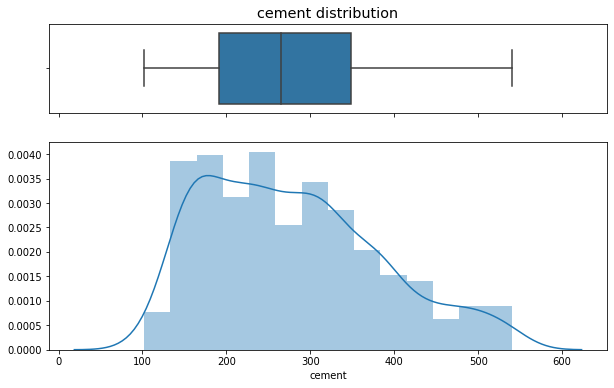

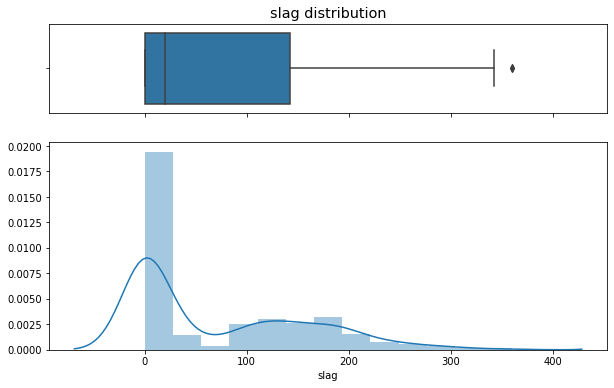

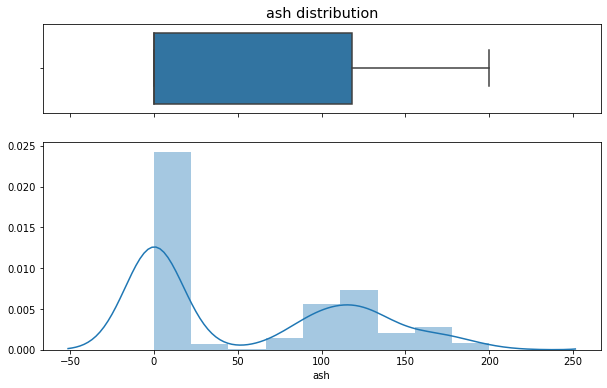

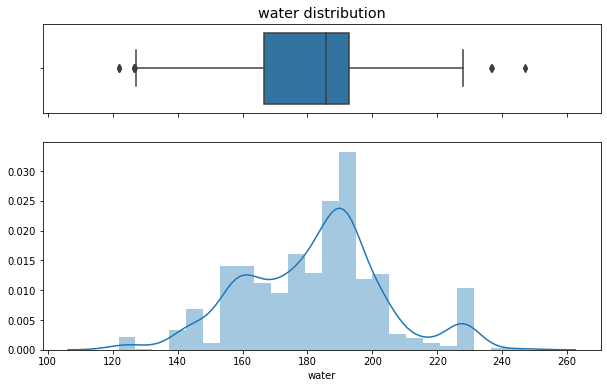

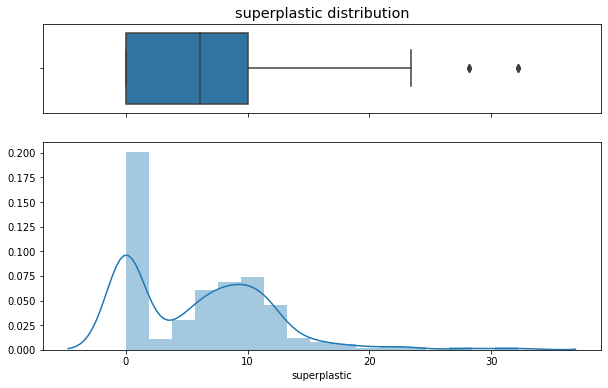

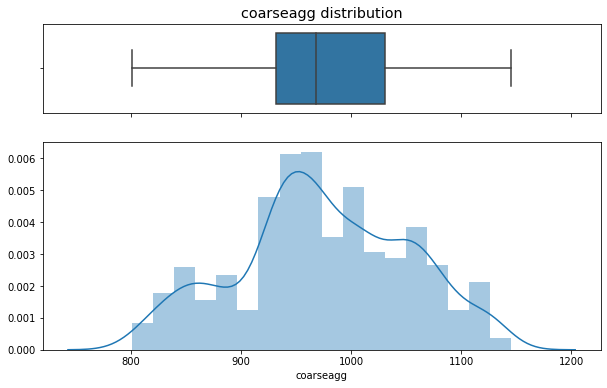

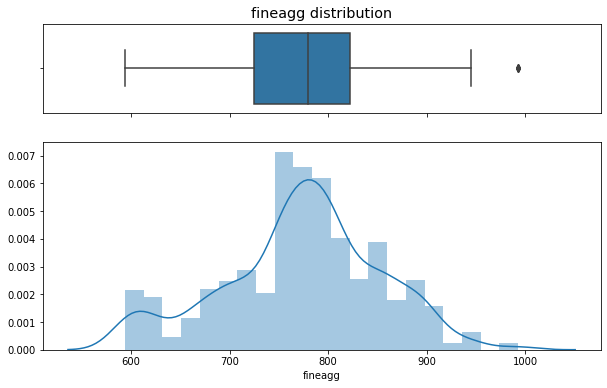

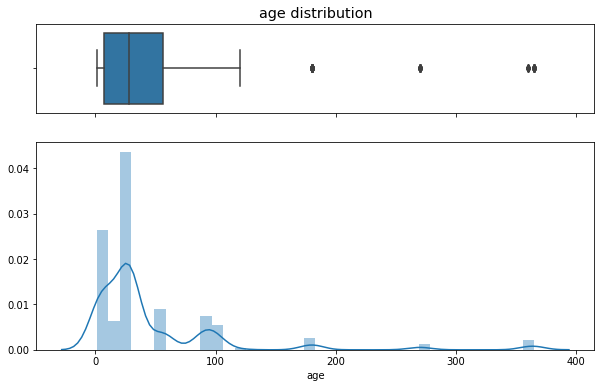

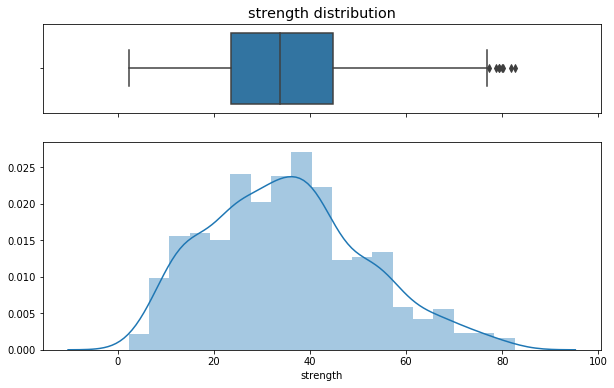

In [15]:
# Plot the distributions and boxplots of all columns to visualise the 5 number summary and skewness.
for column in concrete_df:
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)}, figsize=(10,6))
    ax_box.set_title(column + " distribution", size='x-large')
    # Add a graph in each part
    sns.boxplot(concrete_df[column], ax=ax_box)
    sns.distplot(concrete_df[column], ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

In [16]:
# For all the columns except for age, there aren't that many outliers, the skewness is low and the outliers are actual values which are near 1.5IQR.
# Therefore I won't treat the outliers, except for the age column.
# Many of the distributions are multi-modal.
# For cement, water, coarseagg and fineagg, it almost seems that there are 3 distributions cought up together.
# For slag ash and superplastic there are peaks at 0 because many recipes don't include them.
# The age feature is very skew with a long tail, it might be beneficial to take the logarithm of it.

### Bivariate Analysis

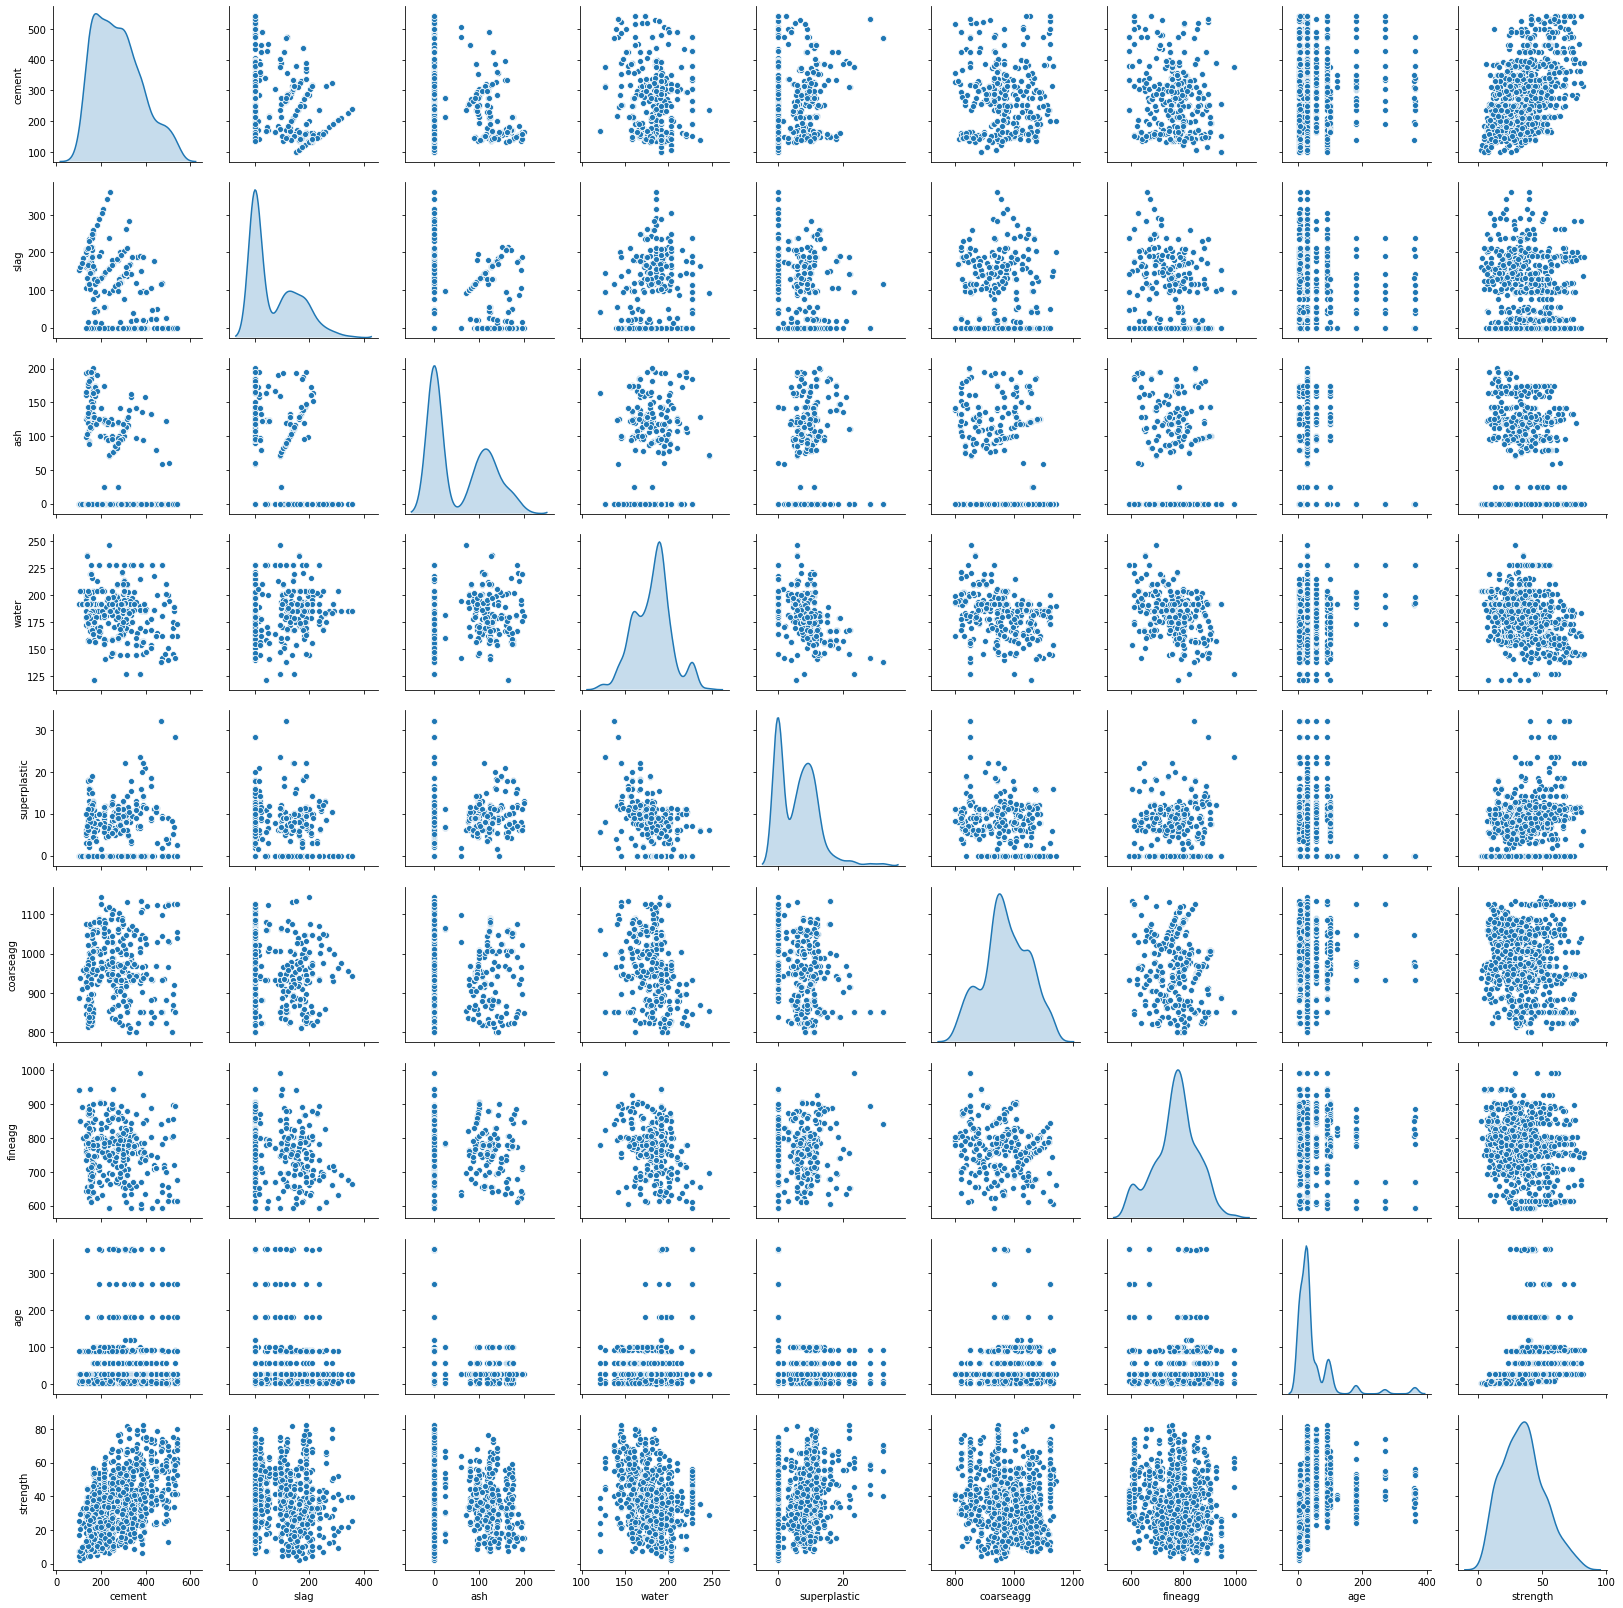

In [17]:
# Have a look at the ditributions of the columns.
sns.pairplot(data=concrete_df, diag_kind='kde')

In [18]:
# It looks like there are mutliple distributions cought up in the same dataset. Many of the distributions are multimodal.
# I wonder if it would make sense to split the dataset into types of concrete and do supervised learning on each subset, bu there is not enough data for that.

In [19]:
# Look for any correlation between the features.
concrete_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.0000,-0.3033,-0.3856,-0.0566,0.0609,-0.0862,-0.2454,0.0863,0.4883
slag,-0.3033,1.0000,-0.3124,0.1303,0.0198,-0.2776,-0.2897,-0.0428,0.1034
ash,-0.3856,-0.3124,1.0000,-0.2833,0.4142,-0.0265,0.0903,-0.1589,-0.0806
water,-0.0566,0.1303,-0.2833,1.0000,-0.6469,-0.2125,-0.4449,0.2793,-0.2696
superplastic,0.0609,0.0198,0.4142,-0.6469,1.0000,-0.2417,0.2080,-0.1941,0.3442
coarseagg,-0.0862,-0.2776,-0.0265,-0.2125,-0.2417,1.0000,-0.1622,-0.0053,-0.1447
fineagg,-0.2454,-0.2897,0.0903,-0.4449,0.2080,-0.1622,1.0000,-0.1566,-0.1864
age,0.0863,-0.0428,-0.1589,0.2793,-0.1941,-0.0053,-0.1566,1.0000,0.3374
strength,0.4883,0.1034,-0.0806,-0.2696,0.3442,-0.1447,-0.1864,0.3374,1.0000


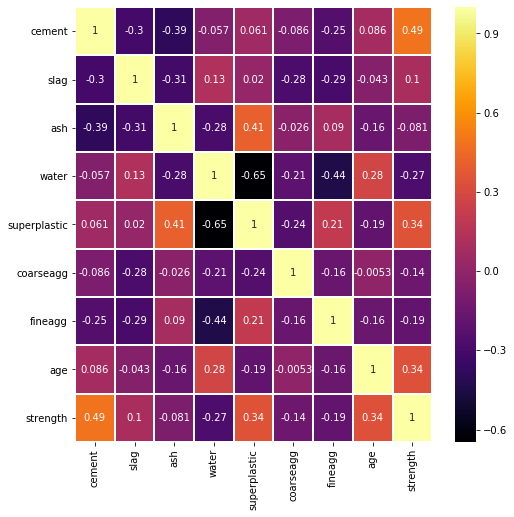

In [20]:
# Represent the correlation visually.
plt.figure(figsize=(8,8))
sns.heatmap(concrete_df.corr(), annot=True, linewidth=1, cmap='inferno')

In [21]:
# There is little relationship between the features.
# The highest correlation is between cement and strength, which makes sense.
# Superplastic and age have the next highest correlation to strength.
# One can see that there are streight lines within some of the scatter plots, such as slag vs cement.

### Feature Engineering

[Text(0.5, 0, '')]

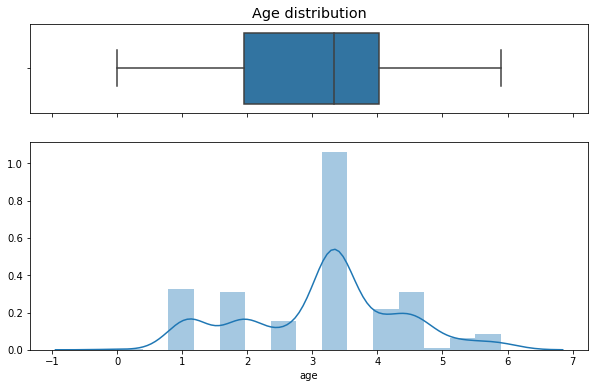

In [22]:
# Create a new array to apply any feature engineering to.
fixedConcrete_df = concrete_df.copy()
# Firstly, take the logarithm of the age feature to see if that improves the shape of the distribution.
fixedConcrete_df['age']=np.log(fixedConcrete_df['age'])
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)}, figsize=(10,6))
ax_box.set_title("Age distribution", size='x-large')
# Add a graph in each part
sns.boxplot(fixedConcrete_df['age'], ax=ax_box)
sns.distplot(fixedConcrete_df['age'], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

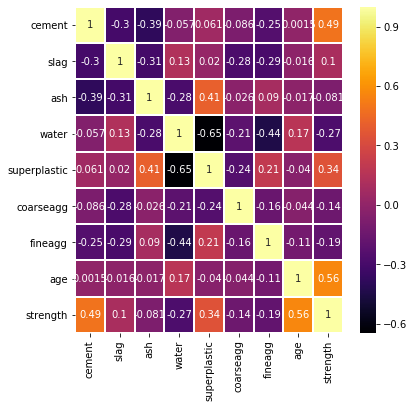

In [23]:
# That is much better, no more outliers.
# Just as a note. Only taking the log of the age feature improved the R2 score of the linear regression models for arounf 60% to around 80%.
# Take a look at the correlation again.
# Represent the correlation visually.
plt.figure(figsize=(6,6))
sns.heatmap(fixedConcrete_df.corr(), annot=True, linewidth=1, cmap='inferno')

In [24]:
# The correlation between age and strength has increased from 0.34 to 0.56.

In [25]:
# Outliers on the other columns will not be handled because:
# There aren't that many outliers.
# The skewness is less than 1 on all other columns.
# The the outliers are actual values, not erreneous values.
# The outliers are near to 1.5IQR.

### Data Preparation

In [26]:
# Split the dataframe into dependent and independent variables.
X = fixedConcrete_df.drop(['strength'], axis='columns')
y = fixedConcrete_df['strength']

In [27]:
# Split the dataframe into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
# Split the training data furhter into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
# On second thought, this dataset is not really large enough to further split the training set. 

In [29]:
# Show the sizes of each set.
print("Dataset shapes:")
print("Training dataset:\tX->{}\ty->{}".format(X_train.shape, y_train.shape))
print("Validation dataset:\tX->{}\ty->{}".format(X_val.shape, y_val.shape))
print("Testing dataset:\tX->{}\ty->{}".format(X_test.shape, y_test.shape))

Dataset shapes:
Training dataset:	X->(527, 8)	y->(527,)
Validation dataset:	X->(176, 8)	y->(176,)
Testing dataset:	X->(302, 8)	y->(302,)


### Machine Learning Models

In [30]:
# First some methods to perform repetitive tasks.
# A function to calculate and return the performance metrics.
def getMetrics(modelName, model, xTrain, xVal, yTrain, yVal):
    ''' Returns a series which can be appended to a dataframe.'''
    metricsDict = {
                    'Train Accuracy':round(model.score(xTrain, yTrain), 4),
                    'Validation Accuracy':round(model.score(xVal, yVal), 4)
                  }
    metricsSeries = pd.Series(name=modelName, data=metricsDict)
    return metricsSeries

def appendMetrics(metrics_df, metrics_series):
    ''' Returns a dataframe with the given series appended.'''
    metrics_df = metrics_df.append(metrics_series)
    metrics_df.drop_duplicates(inplace=True)
    return metrics_df

#### Linear Regression Model

In [31]:
# Let's firts try a standard linear regression model with no fancy things.
model_linReg = LinearRegression()
model_linReg.fit(X_train, y_train)
# Look at the coefficients of the independent variables.
for i, column in enumerate(X_train.columns):
    print("{}:\t{}".format(column, model_linReg.coef_[i]))
# Show the intercept.
print("Intercept:\t{}".format(model_linReg.intercept_))
# Show the training and testing R2 scores.
print("Training R2:\t{}".format(model_linReg.score(X_train, y_train)))
print("Validation R2:\t{}".format(model_linReg.score(X_val, y_val)))

cement:	0.13464321140755117
slag:	0.11991000697579358
ash:	0.09414109167426328
water:	-0.12952561623370593
superplastic:	0.06234552223892555
coarseagg:	0.029464687388550306
fineagg:	0.04100407649243702
age:	8.56105558524308
Intercept:	-80.53897374057324
Training R2:	0.8063067237741799
Validation R2:	0.8397562158416388


#### LinReg Pipeline

In [32]:
# Redo the linear regression model with a pipeline so that steps can easily be added to try and increase accuracy.
# Create a pipeline for the linear regression model.
pipe_linReg = Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])
pipe_linReg.fit(X_train, y_train)
# Look at the coefficients of the independent variables.
for i, column in enumerate(X_train.columns):
    print("{}:\t{}".format(column, pipe_linReg['model'].coef_[i]))
# Show the intercept.
print("Intercept:\t{}".format(pipe_linReg['model'].intercept_))
# Show the training and testing R2 scores.
print("Training R2:\t{}".format(pipe_linReg.score(X_train, y_train)))
print("Validation R2:\t{}".format(pipe_linReg.score(X_val, y_val)))

cement:	14.219803653797198
slag:	10.47689497016246
ash:	6.065145935862843
water:	-2.747866367506988
superplastic:	0.3671487033962965
coarseagg:	2.221264784036591
fineagg:	3.2325224423530075
age:	10.056015044998063
Intercept:	35.82407969639468
Training R2:	0.80630672377418
Validation R2:	0.8397562158416388


In [33]:
# The scaling has resulted in different coefficients and intercept, but the R2 results are exactly the same.
# This is expected since most of the values were already in the same units and therefore already somewhat scaled.
# The scaling does make the coefficients easier to compare though, so the scaling will be kept.

In [34]:
# Start a datafarame for comparison.
comparison_df = pd.DataFrame()
comparison_srs = getMetrics('Linear Regression', pipe_linReg, X_train, X_val, y_train, y_val)
comparison_df = appendMetrics(comparison_df, comparison_srs)
comparison_df

,Train Accuracy,Validation Accuracy
Linear Regression,0.8063,0.8398


#### Ridge Regression Model

In [35]:
# Create a pipeline for the ridge regression model.
pipe_linRidge = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=0.8))])
pipe_linRidge.fit(X_train, y_train)
# Add the scores to the dataframe.
comparison_srs = getMetrics('Linear Ridge Regression', pipe_linRidge, X_train, X_val, y_train, y_val)
comparison_df = appendMetrics(comparison_df, comparison_srs)
comparison_df

,Train Accuracy,Validation Accuracy
Linear Regression,0.8063,0.8398
Linear Ridge Regression,0.8062,0.8392


#### Lasso Regression Model

In [36]:
# Create a pipeline for the lasso regression model.
pipe_linLasso = Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha=0.1))])
pipe_linLasso.fit(X_train, y_train)
# Add the scores to the dataframe.
comparison_srs = getMetrics('Linear Lasso Regression', pipe_linLasso, X_train, X_val, y_train, y_val)
comparison_df = appendMetrics(comparison_df, comparison_srs)
comparison_df

,Train Accuracy,Validation Accuracy
Linear Regression,0.8063,0.8398
Linear Ridge Regression,0.8062,0.8392
Linear Lasso Regression,0.8025,0.8318


#### Linear Regression Observations
- All the linear models yield very similar results.
- These results are not very good.

Convert features to polynomial features to try and improve the results

#### Regression Models With Polynomial Features

In [37]:
# Add a polynomial transform to the linear regression piepline.
# Create a pipeline for the linear regression model.
pipe_polyReg = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree = 3)), ('model', LinearRegression())])
pipe_polyReg.fit(X_train, y_train)
# Add the scores to the dataframe.
comparison_srs = getMetrics('Polynomial Regression', pipe_polyReg, X_train, X_val, y_train, y_val)
comparison_df = appendMetrics(comparison_df, comparison_srs)

In [38]:
# Add a polynomial transform to the ridge regression piepline.
# Create a pipeline for the ridge regression model.
pipe_polyRidge = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree = 3)), ('model', Ridge(alpha=0.8))])
pipe_polyRidge.fit(X_train, y_train)
# Add the scores to the dataframe.
comparison_srs = getMetrics('Polynomial Ridge Regression', pipe_polyRidge, X_train, X_val, y_train, y_val)
comparison_df = appendMetrics(comparison_df, comparison_srs)

In [39]:
# Create a pipeline for the lasso regression model.
pipe_polyLasso = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree = 3)), ('model', Lasso(alpha=0.1, max_iter=10000))])
pipe_polyLasso.fit(X_train, y_train)
# Add the scores to the dataframe.
comparison_srs = getMetrics('Polynomial Lasso Regression', pipe_polyLasso, X_train, X_val, y_train, y_val)
comparison_df = appendMetrics(comparison_df, comparison_srs)

In [40]:
# Display the results of all the regression models.
comparison_df

,Train Accuracy,Validation Accuracy
Linear Regression,0.8063,0.8398
Linear Ridge Regression,0.8062,0.8392
Linear Lasso Regression,0.8025,0.8318
Polynomial Regression,0.9651,0.8737
Polynomial Ridge Regression,0.9540,0.9216
Polynomial Lasso Regression,0.9246,0.9203


#### Linear Regression Observations
- The models with polynomial features perform much better than the linear models.

Next try decision tree and random forest regression models.

In [41]:
# Create a pipeline for the decision tree regression model.
pipe_treeReg = Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeRegressor(random_state=1))])
pipe_treeReg.fit(X_train, y_train)
# Add the scores to the dataframe.
comparison_srs = getMetrics('Decision Tree Regression', pipe_treeReg, X_train, X_val, y_train, y_val)
comparison_df = appendMetrics(comparison_df, comparison_srs)

In [42]:
# Create a pipeline for the tree regression model.
pipe_forestReg = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(n_estimators=50, random_state=1))])
pipe_forestReg.fit(X_train, y_train)
# Add the scores to the dataframe.
comparison_srs = getMetrics('Random Forest Regression', pipe_forestReg, X_train, X_val, y_train, y_val)
comparison_df = appendMetrics(comparison_df, comparison_srs)

In [43]:
# Display the results of all the regression models.
comparison_df

,Train Accuracy,Validation Accuracy
Linear Regression,0.8063,0.8398
Linear Ridge Regression,0.8062,0.8392
Linear Lasso Regression,0.8025,0.8318
Polynomial Regression,0.9651,0.8737
Polynomial Ridge Regression,0.9540,0.9216
Polynomial Lasso Regression,0.9246,0.9203
Decision Tree Regression,0.9988,0.7496
Random Forest Regression,0.9800,0.8961


### KFold Cross Validation

In [44]:
# Functions to create the cross validation comparison.
# A function to calculate and return the performance metrics.
def cvGetMetrics(modelName, results):
    ''' Returns a series which can be appended to a dataframe.'''
    metricsDict = {
                    'Average Score':round(results.mean(), 4),
                    'Standard Deviation':round(results.std(), 4)
                  }
    metricsSeries = pd.Series(name=modelName, data=metricsDict)
    return metricsSeries

cvComparison_df = pd.DataFrame()

In [45]:
# Concatenate the training and validation datasets to form cross validation datasets.
X_crossVal = pd.concat([X_train, X_val], axis='rows')
y_crossVal = pd.concat([y_train, y_val], axis='rows')
#  Check that the sizes are correct.
print("Dataset shapes:")
print("Training dataset:\tX->{}\ty->{}".format(X_train.shape, y_train.shape))
print("Validation dataset:\tX->{}\ty->{}".format(X_val.shape, y_val.shape))
print("Testing dataset:\tX->{}\ty->{}".format(X_crossVal.shape, y_crossVal.shape))

Dataset shapes:
Training dataset:	X->(527, 8)	y->(527,)
Validation dataset:	X->(176, 8)	y->(176,)
Testing dataset:	X->(703, 8)	y->(703,)


In [46]:
numFolds = 7 # So each one is roughly 100 samples.
randomState = 1
kFoldCV = KFold(n_splits=numFolds, shuffle=True, random_state=randomState)

In [47]:
# Do cross validation for the linear regression model.
cvResults_linReg = cross_val_score(estimator=pipe_linReg, cv=kFoldCV, X=X_crossVal, y=y_crossVal, scoring='r2')
cvComparison_srs = cvGetMetrics("Linear Regression", cvResults_linReg)
cvComparison_df = appendMetrics(cvComparison_df, cvComparison_srs)

In [48]:
# Do cross validation for the linear ridge regression model.
cvResults_linRidge = cross_val_score(estimator=pipe_linRidge, cv=kFoldCV, X=X_crossVal, y=y_crossVal, scoring='r2')
cvComparison_srs = cvGetMetrics("Linear Ridge Regression", cvResults_linRidge)
cvComparison_df = appendMetrics(cvComparison_df, cvComparison_srs)

In [49]:
# Do cross validation for the linear lasso regression model.
cvResults_linLasso = cross_val_score(estimator=pipe_linLasso, cv=kFoldCV, X=X_crossVal, y=y_crossVal, scoring='r2')
cvComparison_srs = cvGetMetrics("Linear Lasso Regression", cvResults_linLasso)
cvComparison_df = appendMetrics(cvComparison_df, cvComparison_srs)

In [50]:
# Do cross validation for the polynomial regression model.
cvResults_polyReg = cross_val_score(estimator=pipe_polyReg, cv=kFoldCV, X=X_crossVal, y=y_crossVal, scoring='r2')
cvComparison_srs = cvGetMetrics("Polynomial Regression", cvResults_polyReg)
cvComparison_df = appendMetrics(cvComparison_df, cvComparison_srs)

In [51]:
# Do cross validation for the polynomial Ridge regression model.
cvResults_polyRidge = cross_val_score(estimator=pipe_polyRidge, cv=kFoldCV, X=X_crossVal, y=y_crossVal, scoring='r2')
cvComparison_srs = cvGetMetrics("Polynomial Ridge Regression", cvResults_polyRidge)
cvComparison_df = appendMetrics(cvComparison_df, cvComparison_srs)

In [52]:
# Do cross validation for the polynomial lasso regression model.
cvResults_polyLasso = cross_val_score(estimator=pipe_polyLasso, cv=kFoldCV, X=X_crossVal, y=y_crossVal, scoring='r2')
cvComparison_srs = cvGetMetrics("Polynomial Lasso Regression", cvResults_polyLasso)
cvComparison_df = appendMetrics(cvComparison_df, cvComparison_srs)

In [53]:
# Do cross validation for the decision tree regression model.
cvResults_treeReg = cross_val_score(estimator=pipe_treeReg, cv=kFoldCV, X=X_crossVal, y=y_crossVal, scoring='r2')
cvComparison_srs = cvGetMetrics("Decision Tree Regression", cvResults_treeReg)
cvComparison_df = appendMetrics(cvComparison_df, cvComparison_srs)

In [54]:
# Do cross validation for the random forest regression model.
cvResults_forestReg = cross_val_score(estimator=pipe_forestReg, cv=kFoldCV, X=X_crossVal, y=y_crossVal, scoring='r2')
cvComparison_srs = cvGetMetrics("Random Forest Regression", cvResults_forestReg)
cvComparison_df = appendMetrics(cvComparison_df, cvComparison_srs)

In [55]:
cvComparison_df

,Average Score,Standard Deviation
Linear Regression,0.8089,0.0248
Linear Ridge Regression,0.8088,0.0243
Linear Lasso Regression,0.8043,0.0219
Polynomial Regression,0.8582,0.1182
Polynomial Ridge Regression,0.8680,0.1129
Polynomial Lasso Regression,0.8792,0.0497
Decision Tree Regression,0.8193,0.0419
Random Forest Regression,0.8879,0.0268


In [56]:
# Random forest has the highest score and lowest deviation.
# The polynomial lasso is close to random forest, but double the stadard deviation of the scores.
# The polynomial lasso model ihas the best score of the polynomial regression models and the lowest std deviation of scores.

### Parameter Tuning

In [57]:
# The following 2 models will be refined further.
# 2. Polynomial Lasso Regression (pipe_polyLasso), because it has the highest score and lowest standard deviation of the polynomial regression models.
# 3. Random Forest Regression (pipe_forestReg), it has the best overall score and std deviation.

#### Feature selection.

In [58]:
# Lets first see how the models will be affected by removing features.
# Build step forward feature selection for the Polynomial Lasso regression.
polyLasso_sfs = SequentialFeatureSelector(pipe_polyLasso, k_features=8, forward=True, scoring='r2', cv=kFoldCV)
# Perform SFS
polyLasso_sfs = polyLasso_sfs.fit(X_crossVal.values, y_crossVal.values)
polyLasso_sfsMetrics = polyLasso_sfs.get_metric_dict()
for key, value in polyLasso_sfsMetrics.items():
    print(str(key) + " : " + str(polyLasso_sfsMetrics[key]['feature_idx']) + " : " + str(round(polyLasso_sfsMetrics[key]['avg_score'], 4)))
    

1 : (7,) : 0.3394
2 : (0, 7) : 0.6206
3 : (0, 1, 7) : 0.7478
4 : (0, 1, 3, 7) : 0.8317
5 : (0, 1, 3, 4, 7) : 0.8625
6 : (0, 1, 3, 4, 6, 7) : 0.8714
7 : (0, 1, 2, 3, 4, 6, 7) : 0.8755
8 : (0, 1, 2, 3, 4, 5, 6, 7) : 0.8792


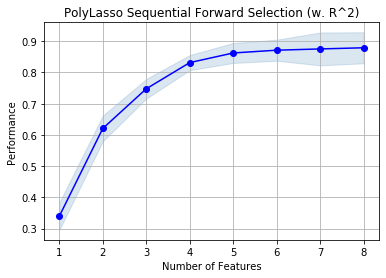

In [59]:
fig = plot_sequential_feature_selection(polyLasso_sfs.get_metric_dict())
plt.title('PolyLasso Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [60]:
# Build step forward feature selection for the Polynomial Lasso regression.
forestReg_sfs = SequentialFeatureSelector(pipe_forestReg, k_features=8, forward=True, scoring='r2', cv=kFoldCV)
# Perform SFS
forestReg_sfs = forestReg_sfs.fit(X_crossVal.values, y_crossVal.values)
forestReg_sfsMetrics = forestReg_sfs.get_metric_dict()
for key, value in forestReg_sfsMetrics.items():
    print(str(key) + " : " + str(forestReg_sfsMetrics[key]['feature_idx']) + " : " + str(round(forestReg_sfsMetrics[key]['avg_score'], 4)))
    

1 : (7,) : 0.3973
2 : (0, 7) : 0.6508
3 : (0, 1, 7) : 0.805
4 : (0, 1, 3, 7) : 0.8716
5 : (0, 1, 3, 4, 7) : 0.8829
6 : (0, 1, 3, 4, 6, 7) : 0.8858
7 : (0, 1, 2, 3, 4, 6, 7) : 0.8861
8 : (0, 1, 2, 3, 4, 5, 6, 7) : 0.8879


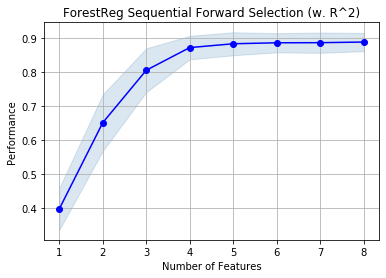

In [61]:
fig = plot_sequential_feature_selection(forestReg_sfs.get_metric_dict())
plt.title('ForestReg Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

#### Feature Selection Observations
- The age feature is the most important feature as it is included with all feature variants.
- Both models will do quite well with only 5 features.
- The random forest model is more immune to dropping features, as it's score only starts decreasing significantly once 4 features have been dropped.
- For now our dataset is small so we don't need to drop features to save on complexity.
- When we do need to start dropping features we can comfortably go down to 6 features for the Polynomial Lasso regression and 5 (maybe even 4) for the Random Forest regression.

#### Grid Search

In [62]:
# Grid search for the Polynomial Lasso Regression.
gridParams_polyLasso = {"poly__degree":[2, 3, 4],
                        "poly__interaction_only":[True, False],
                        "model__alpha":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
gridSearch_polyLasso = GridSearchCV(pipe_polyLasso , param_grid=gridParams_polyLasso, cv=5) 
gridSearch_polyLasso.fit(X_crossVal, y_crossVal) 
gridSearch_polyLasso.best_params_

{'model__alpha': 0.1, 'poly__degree': 4, 'poly__interaction_only': False}

In [63]:
gridSearch_polyLasso.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=10000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [64]:
# How convenient, these are the same values already in use.

In [65]:
# Grid Search for the Random Forest Regression.
# use a full grid over all parameters
gridParams_forestReg = {"model__criterion": ["mse", "mae"],
                        "model__max_depth": [3, 5, 7, None],
                        "model__min_samples_split": [2, 5, 8],
                        "model__min_samples_leaf": [1, 3, 10],
                        "model__bootstrap": [True, False]}
gridSearch_forestReg = GridSearchCV(pipe_forestReg, param_grid=gridParams_forestReg, cv=5) 
gridSearch_forestReg.fit(X_crossVal, y_crossVal)
gridSearch_forestReg.best_params_

{'model__bootstrap': True,
 'model__criterion': 'mse',
 'model__max_depth': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2}

In [66]:
gridSearch_forestReg.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=50, n_jobs=None,
                                       oob_score=False, random_state=1,
                                       verbose=0, warm_start=False))],
         verbose=False)

### Final Models

In [67]:
# Function for final model evaluation metrics
# A function to calculate and return the performance metrics.
def getMetrics(modelName, model, xTrain, xTest, yTrain, yTest):
    ''' Returns a series which can be appended to a dataframe.'''
    yPred = model.predict(xTest)
    mse = np.mean((yPred-y_test)**2)
    rmse = math.sqrt(mse)
    maxError = np.max((yPred-y_test))
    metricsDict = {
                    'Training R2':round(model.score(xTrain, yTrain), 4),
                    'Testing R2':round(model.score(xTest, yTest), 4),
                    'Root Mean Squarred Error':round(rmse, 4),
                    'Maximum Error':round(maxError,4)
                  }
    metricsSeries = pd.Series(name=modelName, data=metricsDict)
    return metricsSeries

finalComparison_df = pd.DataFrame()

In [68]:
# Polynomial Lasso Regression.
pipe_polyLasso_best = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree = 4, interaction_only=False)), ('model', Lasso(alpha=0.1, max_iter=10000))])
pipe_polyLasso_best.fit(X_crossVal, y_crossVal)
finalComparison_srs = getMetrics('Polynomial Lasso Regression', pipe_polyLasso_best, X_crossVal, X_test, y_crossVal, y_test)
finalComparison_df = appendMetrics(finalComparison_df, finalComparison_srs)
finalComparison_df

,Maximum Error,Root Mean Squarred Error,Testing R2,Training R2
Polynomial Lasso Regression,17.1339,4.8140,0.9003,0.9463


In [69]:
# Random Forest Regression.
pipe_forestReg_best = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(criterion='mse', n_estimators=50, min_samples_leaf=1, max_depth=None, min_samples_split=2, bootstrap=True, random_state=1))])
pipe_forestReg_best.fit(X_crossVal, y_crossVal)
finalComparison_srs = getMetrics('Random Forest Regression', pipe_forestReg_best, X_crossVal, X_test, y_crossVal, y_test)
finalComparison_df = appendMetrics(finalComparison_df, finalComparison_srs)
finalComparison_df

,Maximum Error,Root Mean Squarred Error,Testing R2,Training R2
Polynomial Lasso Regression,17.1339,4.8140,0.9003,0.9463
Random Forest Regression,16.9295,5.0063,0.8921,0.9824


In [70]:
# The Maximum Error and the Root Mean Squared Error are calculated on the Testing Data.

### Final Observation
- The Polynomial Lasso Regression (PLR) model and the Random Forest Regression model (RFR) deliver very similar results with different techniques.
- The PLR model has is better fit overall, having a smaller differenc between the traing and testing R2 values.
- Although the PLR model performs ever so slightly better, having a higher R2 and lower RMSE, the results are so close that the RFR model may be better on another testing dataset.
- Once the dataset starts to grow large, the model complexity will probably become a deciding factor when chosing between the two models.
- The PLR model is quite complex with a polynomial degree of 4 and the R2 drops off more rapidly when simplified by removing features.
- The RFR model is more resilient to removing features and can thus be simplified more easily.